In [1]:
import pandas as pd
import os
import numpy as np

# This line is needed to display plots inline in Jupyter Notebook
%matplotlib inline

# Required for basic python plotting functionality
import matplotlib.pyplot as plt

# Required for formatting dates later in the case
import datetime
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# Required to display image inline
from IPython.display import Image

# Advanced plotting functionality with seaborn
import seaborn as sns
sns.set(style="whitegrid") # can set style depending on how you'd like it to look

import folium  #needed for interactive map
from folium.plugins import HeatMap

import branca

import geopandas
from shapely.geometry import Polygon
from shapely.geometry import Point
from geopandas import GeoDataFrame



plotsize = (15,6)


In [4]:
data_g15 = pd.read_excel(io = "./MTFF Graphs English.xlsx", sheet_name = "G 1.5.", skiprows = 3, usecols = "C:D", header = 0, nrows = 10)

data_g15.rename({"Concepto ": 'KPI',
                'Valor': '% GDP'}, axis = 1, inplace = True)

data_g15['KPI'] = data_g15['KPI'].str.replace('\n',' ')

print(data_g15)

                        KPI  % GDP
0      Financial Plan  2024   -5.3
1           Non-oil  income   -0.8
2  Arbitration  of disputes   -0.6
3           Management DIAN   -0.6
4                 Interests   -0.3
5                   Imports   -0.1
6               Oil incomes    0.0
7       Primary Expenditure    1.9
8                MTFF  2024   -5.6


In [5]:
data_g15_graph = data_g15.copy()
data_g15_graph

,KPI,% GDP
0,Financial Plan 2024,-5.3
1,Non-oil income,-0.8
2,Arbitration of disputes,-0.6
3,Management DIAN,-0.6
4,Interests,-0.3
5,Imports,-0.1
6,Oil incomes,0.0
7,Primary Expenditure,1.9
8,MTFF 2024,-5.6


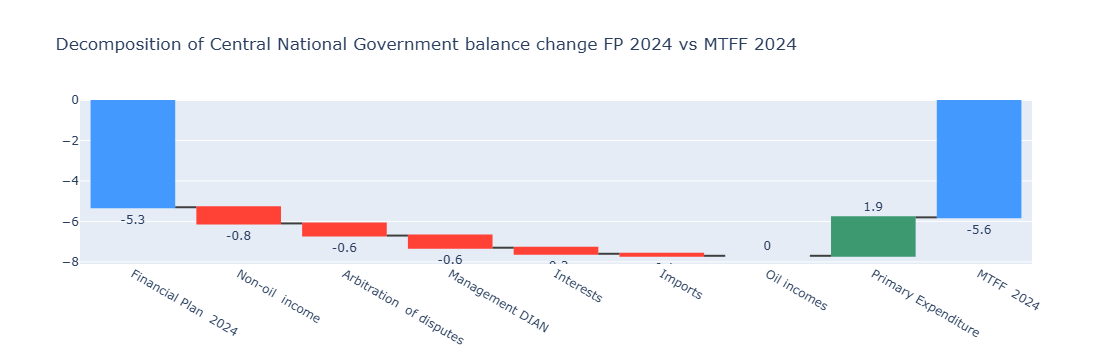

In [13]:
import plotly.express as px
import plotly.graph_objects as go

df = data_g15_graph.copy()

fig = go.Figure(go.Waterfall(
    name = "20", orientation = "v",
    measure = ["absolute", "relative", "relative", "relative", "relative", "relative", "relative", "relative",  "total"],
    x = df.KPI,
    textposition = "outside",
    text =  df["% GDP"],
    y = df["% GDP"],
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
))

fig.update_layout(
        title = "Decomposition of Central National Government balance change FP 2024 vs MTFF 2024"
)

fig.show()
fig.write_html('./G15.html')

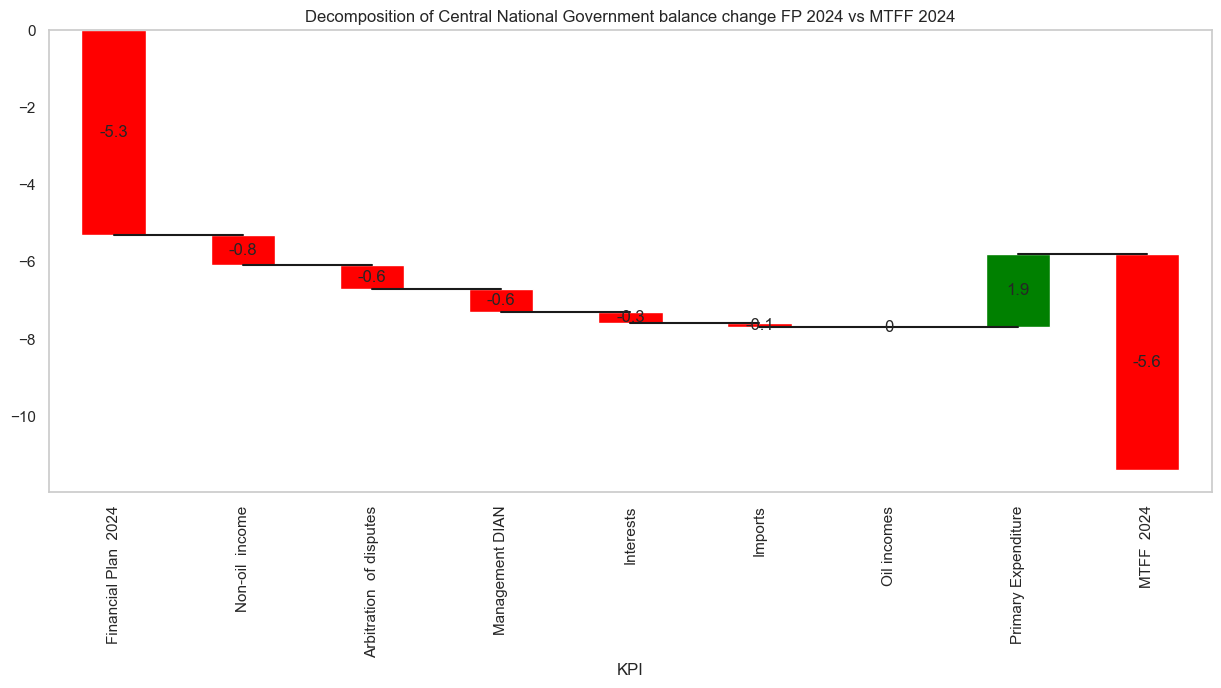

In [17]:
df = data_g15_graph#.pivot(index=None, columns='KPI', values='value').bfill().iloc[[0],:]



colors = df['% GDP'].apply(lambda x: 'green' if x>0 else 'red')
bottom = df['% GDP'].cumsum().shift(1).fillna(0)
gap = bottom.reset_index(drop=True).repeat(3).shift(-1)
gap[1::3] = np.nan  # create gaps 

fig, ax = plt.subplots(figsize = plotsize)
my_plot = df.plot.bar(x='KPI', y='% GDP', legend=None, bottom=bottom,title="Decomposition of Central National Government balance change FP 2024 vs MTFF 2024", color=colors, ax=ax)
my_plot.plot(gap.index, gap.values,'k')

my_plot.bar_label(ax.containers[0], label_type='center')
ax.grid(False)
# my_plot.set_ylim(-1,7)

